In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [4]:
import random

In [5]:
# Deneme sayısı
N = 10000
# Reklam seçeneklerinin sayısı
d = 10
# Her reklamın başlangıçta ödül ve tıklama sayısı sıfır
oduller = [0] * d
tiklamalar = [0] * d
# Toplam ödül
toplam = 0
# Seçilen reklamları tutmak için bir liste oluştur
secilenler = []

In [6]:
# Her bir tur için
for n in range(1, N):
    ad = 0  # Seçilen aksiyonun indeksi
    max_ucb = 0  # Maksimum Üst Güven Sınırı (UCB) değeri

    # Her bir aksiyon için
    for i in range(0, d):
        # Eğer aksiyon daha önce seçilmişse
        if tiklamalar[i] > 0:
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2 * math.log(n) / tiklamalar[i])
            # UCB hesapla
            ucb = ortalama + delta
        else:
            # Aksiyon hiç seçilmemişse
            ucb = N * 10

        # Maksimum UCB'yi güncelle
        if max_ucb < ucb:
            max_ucb = ucb
            ad = i  # Seçilen aksiyonun indeksini güncelle

    # Seçilen aksiyonu listeye ekle
    secilenler.append(ad)
    # Seçilen aksiyonun kaç kez seçildiğini güncelle
    tiklamalar[ad] = tiklamalar[ad] + 1
    # Aksiyonun ödülünü al
    # (Burada df.values kullanıldığı için, df'nin tanımlanması gerekiyor)
    # (Bir veri çerçevesi olarak, veri çerçevesinden ödülleri nasıl alacağınızı göstermek için)
    odul = df.values[n, ad]
    # Aksiyonun toplam ödülünü güncelle
    oduller[ad] = oduller[ad] + odul
    # Toplam ödülü güncelle
    toplam = toplam + odul

<ipython-input-7-f1a4b679e19f>:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,9,1)


Text(0, 0.5, 'Frekans')

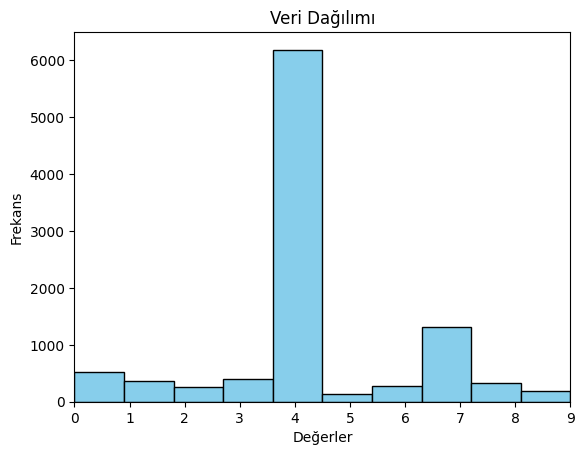

In [7]:
plt.hist(secilenler, bins=10, color='skyblue', edgecolor='black')
plt.xlim(0,9,1)
plt.title('Veri Dağılımı')
plt.xlabel('Değerler')
plt.ylabel('Frekans')